In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.drop(['MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays'],axis =1)

target = train['yield']
train.drop(['yield'], axis=1, inplace=True)
x = train.values


                 id     clonesize      honeybee       bumbles       andrena  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean    7644.000000     19.704690      0.389314      0.286768      0.492675   
std     4413.698468      6.595211      0.361643      0.059917      0.148115   
min        0.000000     10.000000      0.000000      0.000000      0.000000   
25%     3822.000000     12.500000      0.250000      0.250000      0.380000   
50%     7644.000000     25.000000      0.500000      0.250000      0.500000   
75%    11466.000000     25.000000      0.500000      0.380000      0.630000   
max    15288.000000     40.000000     18.430000      0.585000      0.750000   

              osmia  MaxOfUpperTRange   RainingDays      fruitset  \
count  15289.000000      15289.000000  15289.000000  15289.000000   
mean       0.592355         82.169887     18.660865      0.502741   
std        0.139489          9.146703     11.657582      0.074390   
min        0

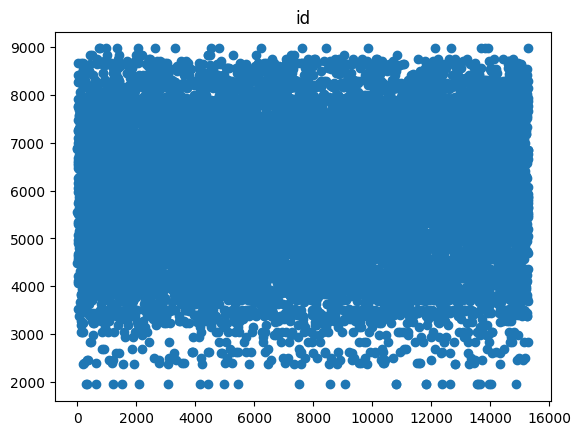

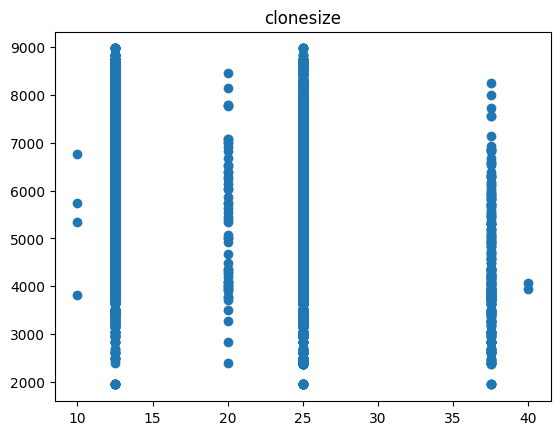

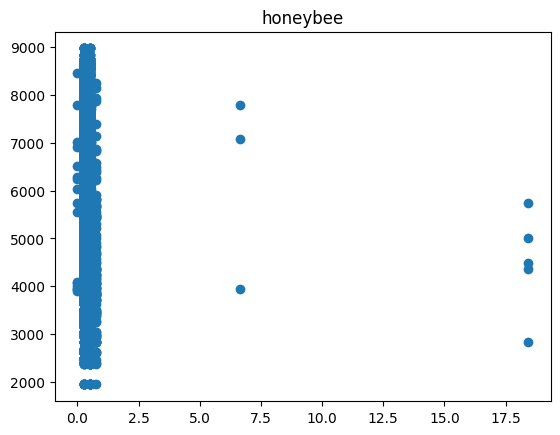

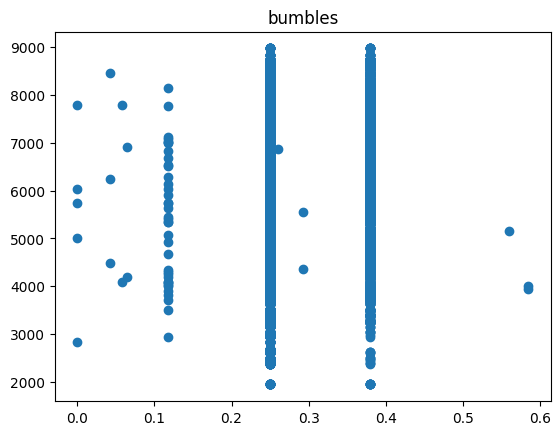

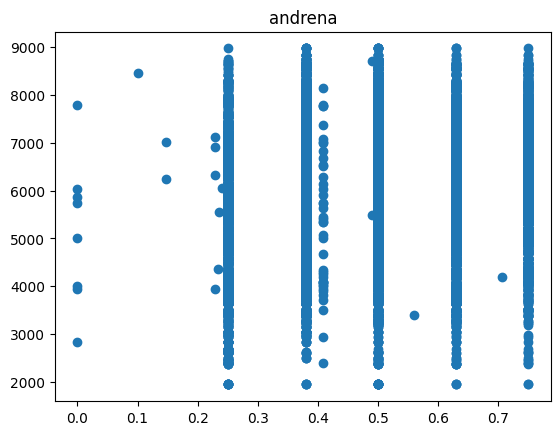

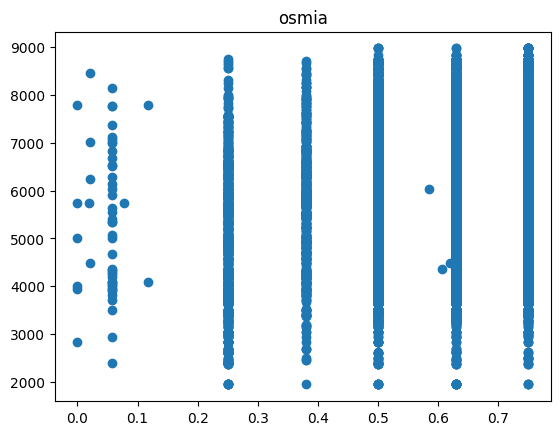

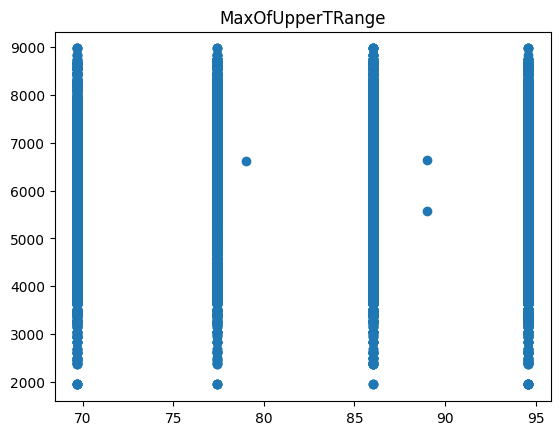

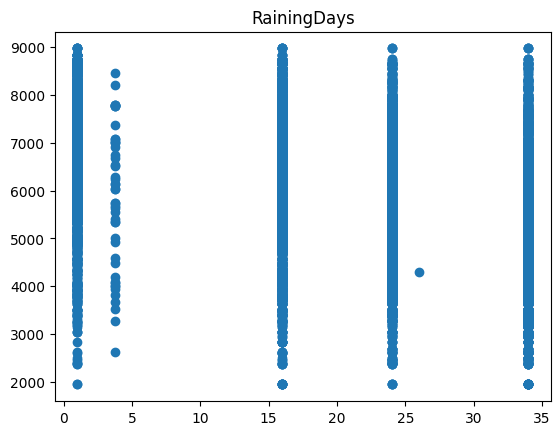

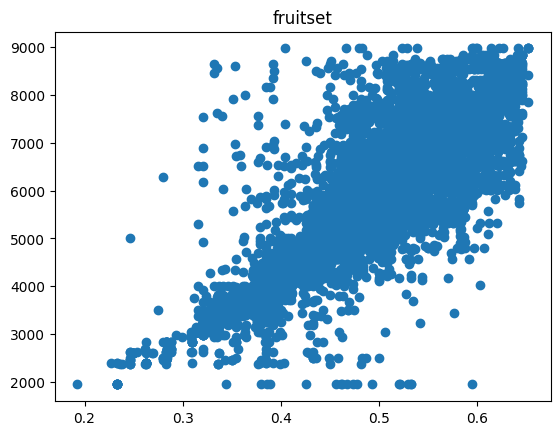

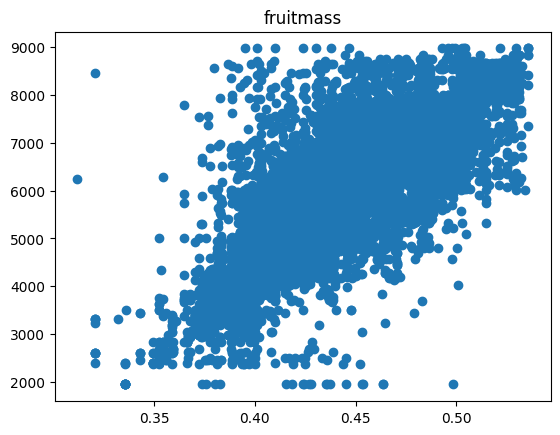

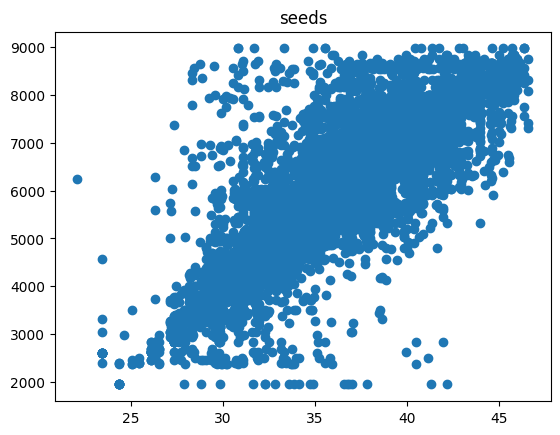

In [19]:
from matplotlib import pyplot as plt
print(train.describe())

# for field in train.keys():
#     plt.hist(train[field])
#     plt.title(field)
#     plt.show()

for field in train.keys():
    plt.scatter(train[field], target)
    plt.title(field)
    plt.show()

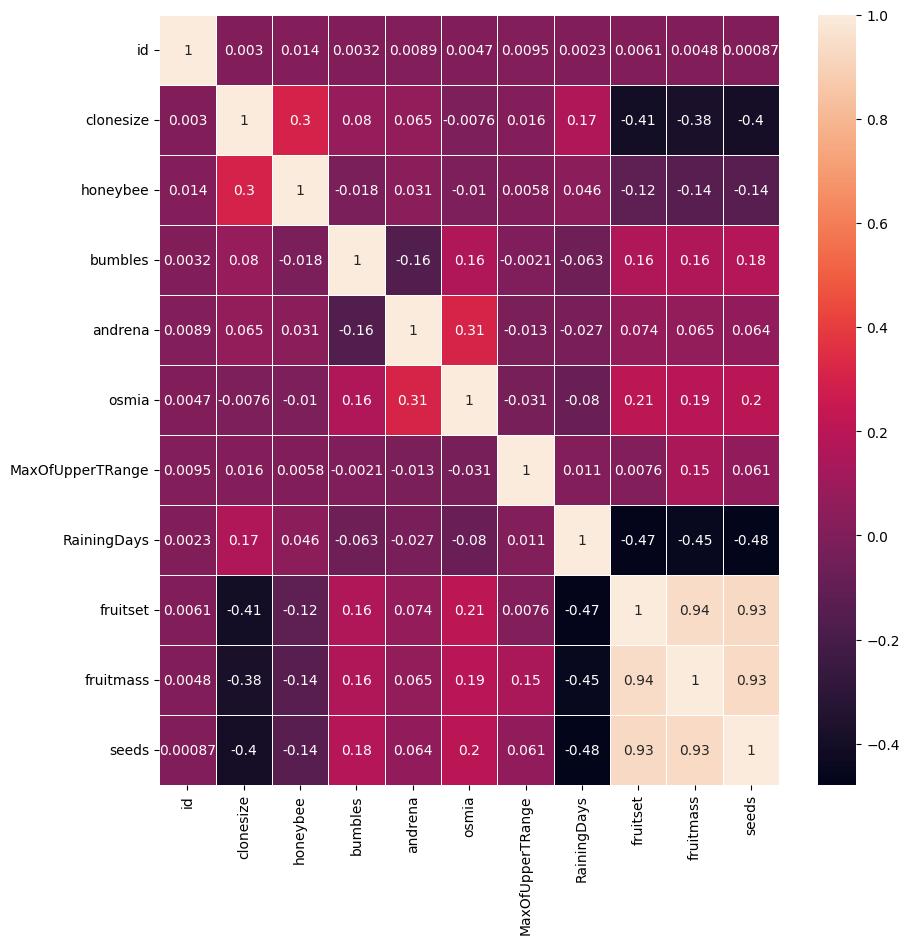

In [25]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sn.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score

models = [GradientBoostingRegressor, SGDRegressor, SVR, BayesianRidge, KernelRidge]
model_names = ['GradientBoostingRegressor', 'SGDRegressor', 'SVR', 'BayesianRidge', 'KernelRidge']
model_scores = []

for model in models:
    model = model()
    model.fit(train, target)
    model_scores.append(model.score(x, target))

score_df = pd.DataFrame({'model': model_names, 'score': model_scores})
score_df.sort_values(by='score', ascending=False)

/Users/ganesh/Desktop/Coding/AI_Projects/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/ganesh/Desktop/Coding/AI_Projects/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
/Users/ganesh/Desktop/Coding/AI_Projects/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/ganesh/Desktop/Coding/AI_Projects/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/ganesh/Desktop/Coding/AI_Projects/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

,model,score
0,GradientBoostingRegressor,8.344274e-01
3,BayesianRidge,8.097013e-01
4,KernelRidge,8.060907e-01
2,SVR,-5.163257e-03
1,SGDRegressor,-2.605844e+26


In [21]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

model = VotingRegressor([('gbr', GradientBoostingRegressor()), ('br', BayesianRidge()), ('kr', KernelRidge())])
scores = cross_val_score(model, train, target, cv=5)
print(scores.mean())


0.8143851947008814


In [22]:
model.fit(train, target)
predictions = model.predict(train)
print(mean_absolute_error(target, predictions))

360.56784254180764


In [23]:
test = pd.read_csv('test.csv')

test = test.drop(['MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays'],axis =1)
to_cat = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange','RainingDays']

predictions = model.predict(test)

submission = pd.DataFrame({'id': test['id'], 'yield': predictions})
submission.to_csv('submission.csv', index=False)
